In [14]:
#writing some conda package or module
#!pip install netCDF4
%matplotlib inline
import warnings
from netCDF4 import Dataset
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
#!pip install cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [15]:
data = xr.open_dataset('/home/mkibria/Academic/pr_of_thesis/observation/chirps/chirps_yearcicle.nc')


data=data.squeeze()


data

<xarray.Dataset>
Dimensions:  (time: 12)
Coordinates:
  * time     (time) datetime64[ns] 2022-01-01 2022-02-01 ... 2021-12-01
    lon      float64 0.0
    lat      float64 0.0
Data variables:
    precip   (time) float32 ...
Attributes: (12/17)
    CDI:               Climate Data Interface version 1.9.9rc1 (https://mpime...
    Conventions:       CF-1.6
    history:           Mon Jul 11 11:59:05 2022: cdo -L fldmean -ymonavg -rem...
    institution:       Climate Hazards Group.  University of California at Sa...
    title:             CHIRPS Version 2.0
    version:           Version 2.0
    ...                ...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
    CDO:               Climate Data Operators version 1.9.9rc1 (https://mpime...

In [16]:
x=data['precip']
x=x/30.4167

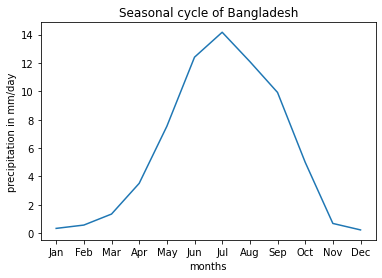

In [17]:


mon=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']
#mon=['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N','D']

mon

plt.title('Seasonal cycle of Bangladesh')
plt.xlabel('months')
plt.ylabel('precipitation in mm/day')
plt.plot(mon,x)
plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/month-vs-pr-chirps.png")


In [4]:
#to select the year from 1980 to 2015
#data = data.sel(time=slice('1981-01-16T12:00:00.000000000','2015-12-16T00:00:00.000000000'))
#data

In [5]:
#selecting only JJAS months

def is_jjas(month):
    return (month >= 6) & (month <= 9)

jjas_data = data.sel(time=is_jjas(data['time.month']))

jjas_data

<xarray.DataArray (variable: 1, time: 4, lat: 1, lon: 1)>
array([[[[12.411855]],

        [[14.170214]],

        [[12.101717]],

        [[ 9.926592]]]], dtype=float32)
Coordinates:
  * time      (time) datetime64[ns] 2021-06-01 2021-07-01 2021-08-01 2021-09-01
  * lon       (lon) float64 0.0
  * lat       (lat) float64 0.0
  * variable  (variable) <U6 'precip'

In [6]:

#data.longitude.values
#data.lat.values
 

In [9]:
#to select the x and y coordinates
jjas_data = jjas_data.sel(lon=slice(86,94),lat=slice(20,27))
jjas_data

<xarray.Dataset>
Dimensions:  (time: 4, lon: 0, lat: 0)
Coordinates:
  * time     (time) datetime64[ns] 2021-06-01 2021-07-01 2021-08-01 2021-09-01
  * lon      (lon) float64 
  * lat      (lat) float64 
Data variables:
    precip   (time, lat, lon) float32 
Attributes: (12/17)
    CDI:               Climate Data Interface version 1.9.9rc1 (https://mpime...
    Conventions:       CF-1.6
    history:           Mon Jul 11 11:59:05 2022: cdo -L fldmean -ymonavg -rem...
    institution:       Climate Hazards Group.  University of California at Sa...
    title:             CHIRPS Version 2.0
    version:           Version 2.0
    ...                ...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ
    CDO:               Climate Data Operators version 1.9.9rc1 (https://mpime...

In [8]:
#getting the mean for JJAS data
jjas_mean = jjas_data.precip.mean('time')
 
jjas_mean 

<xarray.DataArray 'precip' (lat: 1, lon: 1)>
array([[369.6418]], dtype=float32)
Coordinates:
  * lon      (lon) float64 0.0
  * lat      (lat) float64 0.0

In [8]:
#changing unit from mm/month to mm/day
pr_mm = jjas_mean/30.4167
pr_mm

<xarray.DataArray 'precip' (latitude: 140, longitude: 160)>
array([[ 9.619653 ,  9.522512 ,  9.401568 , ..., 22.851358 , 22.267494 ,
        21.491776 ],
       [ 9.6969   ,  9.576748 ,  9.525039 , ..., 22.250105 , 21.697289 ,
        20.956373 ],
       [ 9.79109  ,  9.682337 ,  9.603126 , ..., 21.352385 , 20.79588  ,
        19.802069 ],
       ...,
       [ 9.1870775,  9.28438  ,  9.402707 , ..., 12.626493 , 13.066852 ,
        13.360623 ],
       [ 9.335306 ,  9.37829  ,  9.469229 , ..., 12.927287 , 13.390353 ,
        13.748518 ],
       [ 9.623036 ,  9.658751 ,  9.693466 , ..., 13.406099 , 13.970648 ,
        14.324315 ]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 20.02 20.07 20.12 20.17 ... 26.88 26.92 26.97
  * longitude  (longitude) float32 86.02 86.08 86.12 86.17 ... 93.88 93.92 93.98

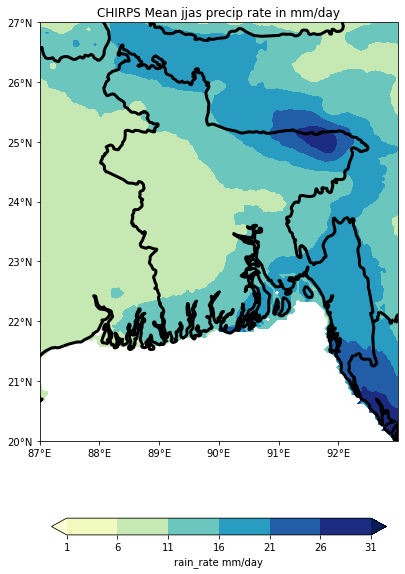

In [9]:
#plotting with cartopy jjas_pr_mean
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


 
m1 = ax.contourf(['longitude'][:], pr_mm['latitude'][:],pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')



# Define the xticks for longitude
ax.set_xticks(np.arange(87,93,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)



plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'rain_rate mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)


ax.add_feature(cfeature.LAND.with_scale(scale))
ax.add_feature(cfeature.OCEAN.with_scale(scale))
ax.add_feature(cfeature.STATES.with_scale(scale))
ax.add_feature(cfeature.LAKES.with_scale(scale), alpha=0.5)
ax.add_feature(cfeature.COASTLINE.with_scale(scale))





plt.title('CHIRPS Mean jjas precip rate in mm/day')
#plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_chirps_jjas_mean.png")




In [10]:
#to select the x and y coordinates
data = data.sel(longitude=slice(86,94),latitude=slice(20,27))
data

<xarray.Dataset>
Dimensions:    (latitude: 140, longitude: 160, time: 419)
Coordinates:
  * latitude   (latitude) float32 20.02 20.07 20.12 20.17 ... 26.88 26.92 26.97
  * longitude  (longitude) float32 86.02 86.08 86.12 86.17 ... 93.88 93.92 93.98
  * time       (time) datetime64[ns] 1981-02-01 1981-03-01 ... 2015-12-01
Data variables:
    precip     (time, latitude, longitude) float32 ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2022-05-16
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [11]:
annual_mean = data.precip.mean('time')
annual_mean

<xarray.DataArray 'precip' (latitude: 140, longitude: 160)>
array([[128.91599 , 127.90964 , 126.618225, ..., 284.76627 , 275.99896 ,
        269.25116 ],
       [130.53674 , 129.22023 , 128.35138 , ..., 277.98755 , 270.63956 ,
        264.2491  ],
       [132.24908 , 130.93236 , 129.58382 , ..., 270.20334 , 262.28305 ,
        252.00252 ],
       ...,
       [115.86087 , 117.74231 , 119.25417 , ..., 200.56328 , 206.69228 ,
        212.01973 ],
       [118.15063 , 119.01423 , 119.880035, ..., 204.71297 , 211.46356 ,
        217.20477 ],
       [122.17359 , 122.7628  , 122.73258 , ..., 210.79192 , 218.28172 ,
        223.78409 ]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 20.02 20.07 20.12 20.17 ... 26.88 26.92 26.97
  * longitude  (longitude) float32 86.02 86.08 86.12 86.17 ... 93.88 93.92 93.98

In [12]:
#converting from mm/month to mm/day

annual_pr_mm = annual_mean/30.416
annual_pr_mm

<xarray.DataArray 'precip' (latitude: 140, longitude: 160)>
array([[4.2384267, 4.2053404, 4.1628823, ..., 9.362384 , 9.074138 ,
        8.852287 ],
       [4.2917128, 4.2484293, 4.219864 , ..., 9.139517 , 8.897934 ,
        8.687833 ],
       [4.3480105, 4.30472  , 4.260383 , ..., 8.883592 , 8.623194 ,
        8.285195 ],
       ...,
       [3.809208 , 3.871065 , 3.9207711, ..., 6.5940056, 6.7955112,
        6.9706645],
       [3.8844893, 3.9128823, 3.9413478, ..., 6.730437 , 6.952379 ,
        7.141135 ],
       [4.016754 , 4.0361257, 4.0351324, ..., 6.930297 , 7.1765428,
        7.357446 ]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 20.02 20.07 20.12 20.17 ... 26.88 26.92 26.97
  * longitude  (longitude) float32 86.02 86.08 86.12 86.17 ... 93.88 93.92 93.98

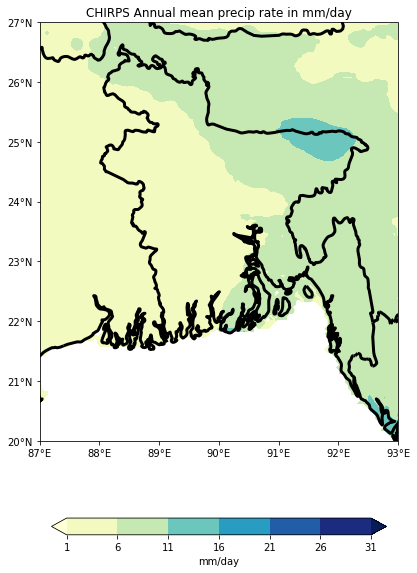

In [13]:
# Plotting annual_pr_mean

#plotting with cartopy
import cartopy.feature as cfeature


fig = plt.figure(figsize=(12,9.5))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([88,93,20,27])


m1 = ax.contourf(annual_pr_mm['longitude'][:], annual_pr_mm['latitude'][:],annual_pr_mm,
                 np.arange(1,35+1,5),transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')

 
# Define the xticks for longitude
ax.set_xticks(np.arange(87,94,1), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(20,28,1), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)


plt.colorbar(m1, orientation = 'horizontal',shrink=0.5, fraction = 0.04 , label = 'mm/day')
ax.coastlines(linewidth=3)
ax.add_feature(cfeature.BORDERS,linewidth=3)
 
#ax.add_feature(cfeature.STATES)
plt.title('CHIRPS Annual mean precip rate in mm/day')


#plt.savefig("/home/mkibria/Academic/pr_of_thesis/figures/bd_pr_chirps_annual_mean.png")